In [ ]:
# import package
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# connect the drive
from google.colab import drive # change directory
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import data set
dfXG = pd.read_csv("/content/drive/MyDrive/DSB6211/inq2015.csv")

In [ ]:
# data exploration
# 1. top 5 rows -- categorical and numeric variables
dfXG.head()

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
0,C,N,NaN,NaN,0,21MAY14,1,0,0,1,...,0,0,0,4,0.017183,0.02038,0.037652,NaN,NaN,N
1,C,N,NaN,NaN,0,15FEB13,1,0,0,1,...,0,0,1,19,0.017183,0.02038,0.037652,NaN,NaN,N
2,B,N,NaN,NaN,0,09JUN12,2,2,0,0,...,0,0,0,27,0.017183,0.02038,0.037652,NaN,NaN,N
3,NaN,N,NaN,NaN,0,25NOV11,3,2,1,0,...,0,0,1,34,0.017183,0.02038,0.037652,NaN,NaN,N
4,NaN,N,NaN,NaN,0,06DEC10,1,1,0,0,...,0,0,1,45,0.017183,0.02038,0.037652,NaN,NaN,N


In [ ]:
# Dropping the rejected variables
dfXG_processed = dfXG.drop(columns=['ACADEMIC_INTEREST_1', 'ACADEMIC_INTEREST_2','IRSCHOOL', 'CONTACT_CODE1', 'CONTACT_DATE'])

In [ ]:
# 2. summary statistics
dfXG.describe(include='all')

,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,71772,91481,44283,24879,91482.000000,91482,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,70553.000000,72014.000000,91482
unique,7,11,211,208,NaN,1113,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,MED,MED,NaN,30JUN13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,31750,14621,6113,2350,NaN,6644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,NaN,NaN,0.031350,NaN,2.166098,1.214119,0.364815,0.547222,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,NaN,NaN,0.174264,NaN,1.852537,1.666529,0.557067,0.649426,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,20608.888129,397.978831,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,32045.000000,114.471414,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,42324.000000,183.546674,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,57314.000000,539.432855,NaN


In [ ]:
# 3. check missing values
dfXG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ETHNICITY            71772 non-null  object 
 1   TERRITORY            91481 non-null  object 
 2   ACADEMIC_INTEREST_1  44283 non-null  object 
 3   ACADEMIC_INTEREST_2  24879 non-null  object 
 4   Enroll               91482 non-null  int64  
 5   CONTACT_DATE         91482 non-null  object 
 6   TOTAL_CONTACTS       91482 non-null  int64  
 7   SELF_INIT_CNTCTS     91482 non-null  int64  
 8   TRAVEL_INIT_CNTCTS   91482 non-null  int64  
 9   SOLICITED_CNTCTS     91482 non-null  int64  
 10  REFERRAL_CNTCTS      91482 non-null  int64  
 11  CAMPUS_VISIT         91482 non-null  int64  
 12  CONTACT_CODE1        91339 non-null  object 
 13  LEVEL_YEAR           91482 non-null  object 
 14  IRSCHOOL             76172 non-null  object 
 15  satscore             27003 non-null 

In [ ]:
# check percentage of missing values
dfXG.isnull().sum()/len(dfXG) *100

ETHNICITY              21.545222
TERRITORY               0.001093
ACADEMIC_INTEREST_1    51.593756
ACADEMIC_INTEREST_2    72.804486
Enroll                  0.000000
CONTACT_DATE            0.000000
TOTAL_CONTACTS          0.000000
SELF_INIT_CNTCTS        0.000000
TRAVEL_INIT_CNTCTS      0.000000
SOLICITED_CNTCTS        0.000000
REFERRAL_CNTCTS         0.000000
CAMPUS_VISIT            0.000000
CONTACT_CODE1           0.156315
LEVEL_YEAR              0.000000
IRSCHOOL               16.735533
satscore               70.482718
sex                     4.189895
mailq                   0.000000
telecq                 77.479723
premiere                0.000000
interest                0.000000
stucell                 0.000000
init_span               0.000000
int1rat                 0.000000
int2rat                 0.000000
hscrat                  0.000000
avg_income             22.877725
distance               21.280689
Instate                 0.000000
dtype: float64

In [ ]:
# Drop 'telecq' due to high missing values, but keep 'satscore' since it is important, we 'll consider imputation methodsfor this one.
dfXG_processed = dfXG_processed.drop(columns=['telecq'])


In [ ]:
# missing values imputation
NA_names =['satscore','sex',
           'avg_income','distance']

# print(NA_names)
dfXG[NA_names]=dfXG[NA_names].fillna(dfXG[NA_names].mean())

# missing for categorical variable
dfXG['ETHNICITY']=dfXG['ETHNICITY'].fillna('C')
dfXG.describe(include='all')



,ETHNICITY,TERRITORY,ACADEMIC_INTEREST_1,ACADEMIC_INTEREST_2,Enroll,CONTACT_DATE,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,...,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,Instate
count,91482,91481,44283,24879,91482.000000,91482,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482
unique,7,11,211,208,NaN,1113,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C,2,MED,MED,NaN,30JUN13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,51460,14621,6113,2350,NaN,6644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56760
mean,NaN,NaN,NaN,NaN,0.031350,NaN,2.166098,1.214119,0.364815,0.547222,...,0.028913,0.053639,0.489922,19.686157,0.037091,0.042896,0.037652,47315.334146,380.427645,NaN
std,NaN,NaN,NaN,NaN,0.174264,NaN,1.852537,1.666529,0.557067,0.649426,...,0.167562,0.242052,0.499901,8.722109,0.024026,0.025244,0.057399,18098.549708,353.101833,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-216.000000,0.000000,0.000000,0.000000,4940.000000,0.417124,NaN
25%,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.000000,0.017183,0.020380,0.000000,34780.000000,146.790013,NaN
50%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,19.000000,0.042105,0.056670,0.033333,47315.334146,329.522736,NaN
75%,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,25.000000,0.049270,0.056670,0.048035,52028.000000,380.427645,NaN


In [ ]:
# double check the missing value number again
dfXG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91482 entries, 0 to 91481
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ETHNICITY            91482 non-null  object 
 1   TERRITORY            91481 non-null  object 
 2   ACADEMIC_INTEREST_1  44283 non-null  object 
 3   ACADEMIC_INTEREST_2  24879 non-null  object 
 4   Enroll               91482 non-null  int64  
 5   CONTACT_DATE         91482 non-null  object 
 6   TOTAL_CONTACTS       91482 non-null  int64  
 7   SELF_INIT_CNTCTS     91482 non-null  int64  
 8   TRAVEL_INIT_CNTCTS   91482 non-null  int64  
 9   SOLICITED_CNTCTS     91482 non-null  int64  
 10  REFERRAL_CNTCTS      91482 non-null  int64  
 11  CAMPUS_VISIT         91482 non-null  int64  
 12  CONTACT_CODE1        91339 non-null  object 
 13  LEVEL_YEAR           91482 non-null  object 
 14  IRSCHOOL             76172 non-null  object 
 15  satscore             91482 non-null 

In [ ]:
# 4. Generate dummy variables
dummy_data =pd.get_dummies(dfXG[['ETHNICITY','TERRITORY','LEVEL_YEAR','Instate']], drop_first = True).astype(int) # transfer into 1/0
dummy_data.describe()

,ETHNICITY_B,ETHNICITY_C,ETHNICITY_H,ETHNICITY_I,ETHNICITY_N,ETHNICITY_O,TERRITORY_1,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_Y
count,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000
mean,0.092663,0.562515,0.109191,0.007892,0.161704,0.029569,0.100774,0.159824,0.101233,0.115990,0.153396,0.098784,0.128943,0.072626,0.035898,0.032465,0.620450
std,0.289961,0.496079,0.311880,0.088488,0.368181,0.169395,0.301031,0.366445,0.301639,0.320215,0.360371,0.298374,0.335139,0.259524,0.186036,0.177234,0.485278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# 5. Construct X
num_names=['TOTAL_CONTACTS','SELF_INIT_CNTCTS','TRAVEL_INIT_CNTCTS','SOLICITED_CNTCTS','REFERRAL_CNTCTS',
           'CAMPUS_VISIT','satscore','sex','mailq','premiere','interest','stucell','init_span','int1rat','int2rat',
           'hscrat','avg_income','distance']

X = pd.concat([dfXG[num_names],dummy_data],axis=1) # axis = 1 means columns


In [ ]:
X.describe(include='all')


,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,satscore,sex,mailq,premiere,...,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_Y
count,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,...,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000,91482.000000
mean,2.166098,1.214119,0.364815,0.547222,0.039899,0.034673,1072.992927,0.631610,4.084377,0.028913,...,0.159824,0.101233,0.115990,0.153396,0.098784,0.128943,0.072626,0.035898,0.032465,0.620450
std,1.852537,1.666529,0.557067,0.649426,0.226191,0.187322,98.243591,0.472157,1.440329,0.167562,...,0.366445,0.301639,0.320215,0.360371,0.298374,0.335139,0.259524,0.186036,0.177234,0.485278
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,420.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1072.992927,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1072.992927,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1072.992927,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,58.000000,56.000000,8.000000,9.000000,5.000000,2.000000,1600.000000,1.000000,5.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#6. Data transformation find the skewness in data
X.skew(skipna=True) # threshold between -2, 2

TOTAL_CONTACTS         3.062389
SELF_INIT_CNTCTS       2.916263
TRAVEL_INIT_CNTCTS     1.418514
SOLICITED_CNTCTS       1.201013
REFERRAL_CNTCTS        7.572001
CAMPUS_VISIT           5.452054
satscore              -0.297848
sex                   -0.557497
mailq                 -1.105478
premiere               5.622951
interest               4.817932
stucell                0.040323
init_span              0.758461
int1rat                3.496845
int2rat                3.215683
hscrat                 7.021978
avg_income             1.432743
distance               2.565859
ETHNICITY_B            2.809657
ETHNICITY_C           -0.252042
ETHNICITY_H            2.506203
ETHNICITY_I           11.122877
ETHNICITY_N            1.837702
ETHNICITY_O            5.554374
TERRITORY_1            2.652452
TERRITORY_2            1.856672
TERRITORY_3            2.644062
TERRITORY_4            2.398505
TERRITORY_5            1.923636
TERRITORY_6            2.689405
TERRITORY_7            2.214392
TERRITOR

array([[<Axes: title={'center': 'TOTAL_CONTACTS'}>,
        <Axes: title={'center': 'SELF_INIT_CNTCTS'}>,
        <Axes: title={'center': 'TRAVEL_INIT_CNTCTS'}>,
        <Axes: title={'center': 'SOLICITED_CNTCTS'}>,
        <Axes: title={'center': 'REFERRAL_CNTCTS'}>,
        <Axes: title={'center': 'CAMPUS_VISIT'}>],
       [<Axes: title={'center': 'satscore'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'mailq'}>,
        <Axes: title={'center': 'premiere'}>,
        <Axes: title={'center': 'interest'}>,
        <Axes: title={'center': 'stucell'}>],
       [<Axes: title={'center': 'init_span'}>,
        <Axes: title={'center': 'int1rat'}>,
        <Axes: title={'center': 'int2rat'}>,
        <Axes: title={'center': 'hscrat'}>,
        <Axes: title={'center': 'avg_income'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'ETHNICITY_B'}>,
        <Axes: title={'center': 'ETHNICITY_C'}>,
        <Axes: title={'center': 'ETHNI

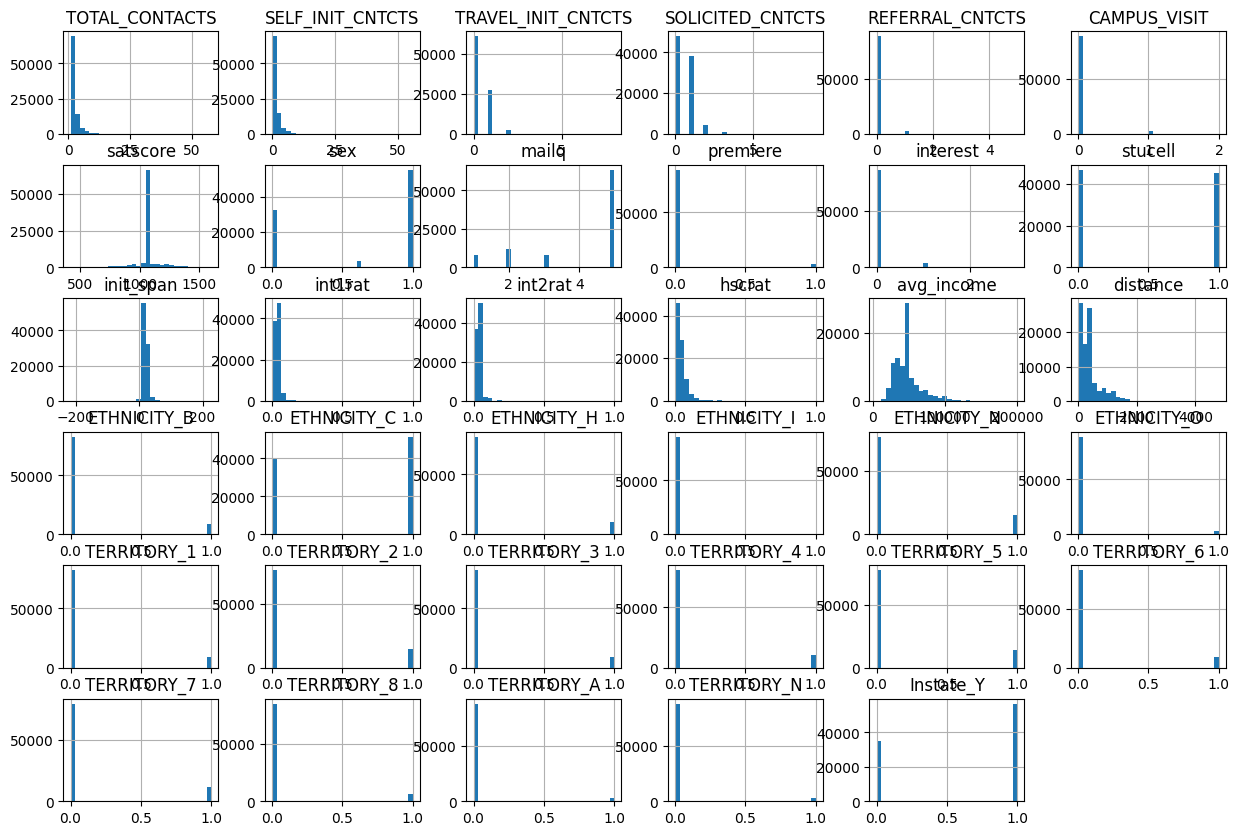

In [ ]:
X.hist(bins=30,figsize=(15,10)) # width and height

In [ ]:
# 6.1 Variable Transformation - part 1
import numpy as np

X['TOTAL_CONTACTS']=np.log(X['TOTAL_CONTACTS'])
X['distance']=np.log(X['distance'])

In [ ]:
# 6.2 Variable Transformation - part 2

def combine(x):
  if x>0:
    return 1
  else:
    return 0

X['SELF_INIT_CNTCTS']=X['SELF_INIT_CNTCTS'].apply(combine)
X['REFERRAL_CNTCTS'] = X['REFERRAL_CNTCTS'].apply(combine)
X['CAMPUS_VISIT'] = X['CAMPUS_VISIT'].apply(combine)
X['premiere'] = X['premiere'].apply(combine)
X['interest'] = X['interest'].apply(combine)
X['int1rat'] = X['int1rat'].apply(combine)
X['int2rat'] = X['int2rat'].apply(combine)
X['hscrat'] = X['hscrat'].apply(combine)

In [ ]:
# 7. Variable Selection -- Highly correlated variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data =pd.DataFrame() # create a empty data frame
vif_data['feature'] = X[num_names].columns # create column feature with variable names


vif_data['VIF'] = [variance_inflation_factor(X[num_names].values, i)
                   for i in range(len(X[num_names].columns))]

vif_data


,feature,VIF
0,TOTAL_CONTACTS,6.971611
1,SELF_INIT_CNTCTS,6.825233
2,TRAVEL_INIT_CNTCTS,3.623889
3,SOLICITED_CNTCTS,3.494591
4,REFERRAL_CNTCTS,1.167436
5,CAMPUS_VISIT,1.198691
6,satscore,84.355470
7,sex,2.805028
8,mailq,18.558725
9,premiere,1.282689


In [ ]:
# Check correlation
X.corr()

# try a nicer interpretation below:
corr = X.corr()
corr.style.background_gradient(cmap="coolwarm").format("{:.2f}") # keep two decimal


,TOTAL_CONTACTS,SELF_INIT_CNTCTS,TRAVEL_INIT_CNTCTS,SOLICITED_CNTCTS,REFERRAL_CNTCTS,CAMPUS_VISIT,satscore,sex,mailq,premiere,interest,stucell,init_span,int1rat,int2rat,hscrat,avg_income,distance,ETHNICITY_B,ETHNICITY_C,ETHNICITY_H,ETHNICITY_I,ETHNICITY_N,ETHNICITY_O,TERRITORY_1,TERRITORY_2,TERRITORY_3,TERRITORY_4,TERRITORY_5,TERRITORY_6,TERRITORY_7,TERRITORY_8,TERRITORY_A,TERRITORY_N,Instate_Y
TOTAL_CONTACTS,1.00,0.61,0.21,0.25,0.07,0.25,0.22,0.04,-0.19,0.38,0.26,0.42,0.06,0.03,0.02,0.08,0.14,-0.14,0.02,-0.13,0.05,0.00,0.07,-0.02,0.04,-0.07,0.05,0.01,-0.04,0.03,0.00,0.08,-0.03,-0.08,0.15
SELF_INIT_CNTCTS,0.61,1.00,-0.09,-0.08,-0.07,0.15,0.00,-0.01,0.03,0.14,0.12,0.27,-0.23,0.05,0.04,0.07,0.14,-0.08,0.02,-0.16,0.05,-0.01,0.12,-0.04,0.02,-0.11,0.05,0.02,-0.04,0.02,0.01,0.06,-0.02,0.03,0.09
TRAVEL_INIT_CNTCTS,0.21,-0.09,1.00,-0.34,-0.05,0.00,0.01,0.03,-0.71,0.06,0.11,0.03,0.12,0.02,-0.02,0.01,-0.05,-0.17,0.00,-0.01,0.15,-0.02,-0.08,-0.06,0.05,-0.08,0.05,0.01,0.00,0.00,-0.01,0.02,-0.02,-0.04,0.22
SOLICITED_CNTCTS,0.25,-0.08,-0.34,1.00,-0.08,-0.03,0.17,0.06,0.31,0.03,-0.01,0.20,0.23,-0.03,-0.01,-0.04,-0.00,0.13,0.01,-0.07,-0.10,0.03,0.13,0.07,-0.02,0.08,-0.06,-0.02,0.01,0.01,0.00,0.01,0.02,-0.07,-0.14
REFERRAL_CNTCTS,0.07,-0.07,-0.05,-0.08,1.00,0.02,0.03,-0.00,0.04,0.05,0.03,-0.05,0.02,0.02,0.02,0.04,-0.00,-0.05,-0.03,0.08,-0.02,-0.00,-0.04,-0.02,-0.01,0.03,0.01,-0.01,-0.02,0.02,0.00,0.00,-0.01,-0.02,0.02
CAMPUS_VISIT,0.25,0.15,0.00,-0.03,0.02,1.00,0.14,0.01,-0.15,0.08,0.12,0.11,0.04,0.01,0.00,0.07,0.11,-0.08,-0.02,0.05,-0.01,-0.01,-0.04,-0.02,0.01,-0.04,0.02,0.00,-0.03,0.02,-0.02,0.07,-0.02,-0.01,0.05
satscore,0.22,0.00,0.01,0.17,0.03,0.14,1.00,-0.03,-0.00,0.14,0.09,0.14,0.09,-0.01,-0.00,0.07,0.18,0.02,-0.18,0.15,-0.14,-0.00,0.02,-0.01,-0.00,0.00,-0.01,-0.01,-0.02,-0.00,-0.00,0.06,0.01,-0.01,-0.05
sex,0.04,-0.01,0.03,0.06,-0.00,0.01,-0.03,1.00,-0.02,0.01,0.00,0.06,0.07,0.00,-0.00,-0.02,-0.02,0.02,0.00,-0.02,0.01,-0.00,0.01,0.01,0.00,0.01,0.00,0.01,-0.00,-0.00,0.01,-0.02,0.02,-0.04,-0.02
mailq,-0.19,0.03,-0.71,0.31,0.04,-0.15,-0.00,-0.02,1.00,-0.05,-0.16,-0.06,-0.07,-0.01,0.03,-0.02,0.03,0.18,-0.03,0.01,-0.14,0.01,0.09,0.05,-0.05,0.06,-0.07,-0.00,0.00,-0.01,0.02,-0.01,0.03,0.04,-0.21
premiere,0.38,0.14,0.06,0.03,0.05,0.08,0.14,0.01,-0.05,1.00,0.14,0.13,0.02,0.02,0.02,0.10,0.09,-0.12,-0.01,0.04,-0.01,-0.00,-0.04,-0.01,0.03,-0.03,0.04,0.02,-0.04,0.02,-0.02,0.03,-0.03,-0.03,0.09


In [ ]:
# remove variables cause large correlation
#X = X.drop(columns=['VALUE'])

In [ ]:
# 8. Generat outcome and Data partitation

y=dfXG['Enroll']
print(y)

from sklearn.model_selection import train_test_split
dfXGX_train,dfXGX_val,dfXGy_train,dfXGy_val=train_test_split(X,y,test_size=0.3,random_state=0)

# can check shape later: for example X_train.shape

dfXGX_train.dtypes

0        0
1        0
2        0
3        0
4        0
        ..
91477    0
91478    0
91479    0
91480    0
91481    0
Name: Enroll, Length: 91482, dtype: int64


TOTAL_CONTACTS        float64
SELF_INIT_CNTCTS        int64
TRAVEL_INIT_CNTCTS      int64
SOLICITED_CNTCTS        int64
REFERRAL_CNTCTS         int64
CAMPUS_VISIT            int64
satscore              float64
sex                   float64
mailq                   int64
premiere                int64
interest                int64
stucell                 int64
init_span               int64
int1rat                 int64
int2rat                 int64
hscrat                  int64
avg_income            float64
distance              float64
ETHNICITY_B             int64
ETHNICITY_C             int64
ETHNICITY_H             int64
ETHNICITY_I             int64
ETHNICITY_N             int64
ETHNICITY_O             int64
TERRITORY_1             int64
TERRITORY_2             int64
TERRITORY_3             int64
TERRITORY_4             int64
TERRITORY_5             int64
TERRITORY_6             int64
TERRITORY_7             int64
TERRITORY_8             int64
TERRITORY_A             int64
TERRITORY_

In [ ]:
# 9. Fit a logistic regression

import statsmodels.api as sm

regressionXG = sm.Logit(dfXGy_train,dfXGX_train).fit() # what is our target and predtors here?
print(regressionXG.summary())




Optimization terminated successfully.
         Current function value: 0.060366
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                 Enroll   No. Observations:                64037
Model:                          Logit   Df Residuals:                    64002
Method:                           MLE   Df Model:                           34
Date:                Fri, 16 Feb 2024   Pseudo R-squ.:                  0.5723
Time:                        14:18:57   Log-Likelihood:                -3865.7
converged:                       True   LL-Null:                       -9038.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
TOTAL_CONTACTS         2.3024      0.078     29.567      0.000       2.150       2.455
SELF

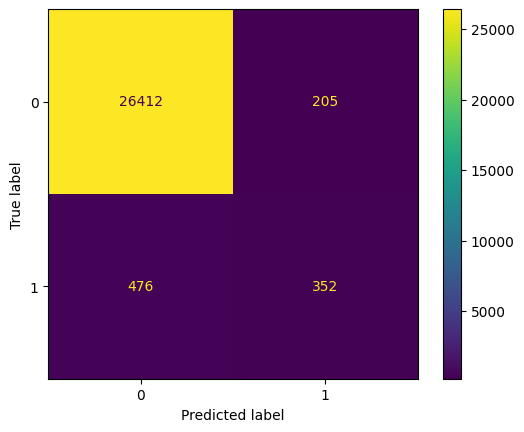

0.9751867371105848


In [ ]:
# 10. Model Evaluation (accuracy + confusion matrix)
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

prediction_prob =regressionXG.predict(dfXGX_val)

# print(prediction_prob)

prediction =list(map(round,prediction_prob))  # map(fun, iter-iterable) =>
cm = confusion_matrix(dfXGy_val,prediction) # row - true value; column - predicted
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()
 #disp.plot()
plt.show() # display all open figures

print(accuracy_score(dfXGy_val,prediction))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(dfXGy_val,prediction)) # recall is sensitivity

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     26617
           1       0.63      0.43      0.51       828

    accuracy                           0.98     27445
   macro avg       0.81      0.71      0.75     27445
weighted avg       0.97      0.98      0.97     27445



Logistic: ROC AUC = 0.980 


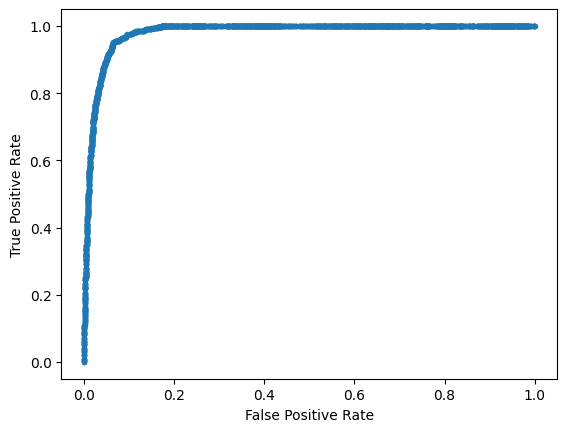

In [ ]:
# model evaluation -- roc curve
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot as plt # Matplotlib is a plotting library for the Python

lr_auc = roc_auc_score(dfXGy_val,prediction_prob)
print('Logistic: ROC AUC = %.3f ' % (lr_auc))  # % as a placeholder; f then refers to "Floating point decimal format", 3 number if decimal after the point


lr_fpr, lr_tpr, threshold = roc_curve(dfXGy_val,prediction_prob)
plt.plot(lr_fpr,lr_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [ ]:
! pip install kds # exclamation mark

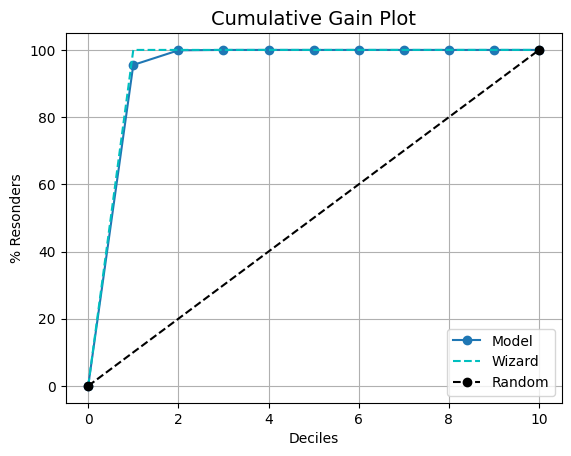

In [ ]:
# 10. model evaluation -- The Cumulative Gain Chart
!pip install kds
import kds
kds.metrics.plot_cumulative_gain(dfXGy_val, prediction_prob) # Wizard curve will provide the best possible curve for the model.


In [ ]:
# Decision Tree


In [ ]:
# tree method 2: pruning
from sklearn import tree
from sklearn.tree import export_text

treeXG = tree.DecisionTreeClassifier()
treeXG = treeXG.fit(dfXGX_train,dfXGy_train)

r2 = export_text(treeXG, feature_names=list(dfXGX_train.columns.values))
print(r2)


|--- TOTAL_CONTACTS <= 1.70
|   |--- TOTAL_CONTACTS <= 1.24
|   |   |--- satscore <= 1076.50
|   |   |   |--- satscore <= 1071.50
|   |   |   |   |--- stucell <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- stucell >  0.50
|   |   |   |   |   |--- hscrat <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- hscrat >  0.50
|   |   |   |   |   |   |--- satscore <= 1005.00
|   |   |   |   |   |   |   |--- init_span <= 7.50
|   |   |   |   |   |   |   |   |--- distance <= 2.21
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- distance >  2.21
|   |   |   |   |   |   |   |   |   |--- distance <= 6.52
|   |   |   |   |   |   |   |   |   |   |--- SOLICITED_CNTCTS <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- SOLICITED_CNTCTS >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- distance >  

In [ ]:
# generate ccp_alphas and impurities for pruning
path = treeXG.cost_complexity_pruning_path(dfXGX_train, dfXGy_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities  # ccp.alpha: control the size of the tree


# Train a decision tree using different alpha values (complexity parameters)
treeXGs = []
for ccp_alpha in ccp_alphas:
    treeXG = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    treeXG.fit(dfXGX_train, dfXGy_train)
    treeXGs.append(treeXG)

In [ ]:
# model evaluation based on the validation data set
train_scores = [treeXG.score(dfXGX_train, dfXGy_train) for treeXG in treeXGs]
validation_scores = [treeXG.score(dfXGX_val, dfXGy_val) for treeXG in treeXGs]

print(validation_scores)
print(ccp_alphas)


[0.9667699034432501, 0.9668427764620149, 0.9668792129713973, 0.9668792129713973, 0.9668427764620149, 0.9668427764620149, 0.9668427764620149, 0.9668792129713973, 0.9668792129713973, 0.9669520859901621, 0.9669156494807798, 0.9669885224995446, 0.9669520859901621, 0.9669520859901621, 0.9669520859901621, 0.9669520859901621, 0.9669520859901621, 0.9669156494807798, 0.9670613955183094, 0.9670249590089269, 0.9670249590089269, 0.9670249590089269, 0.9670249590089269, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9671342685370742, 0.9671342685370742, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917, 0.9670613955183094, 0.9670613955183094, 0.9670613955183094, 0.9670613955183094, 0.9670613955183094, 0.9670613955183094, 0.9670613955183094, 0.9671342685370742, 0.9671342685370742, 0.9670978320276917, 0.9670978320276917, 0.9670978320276917,

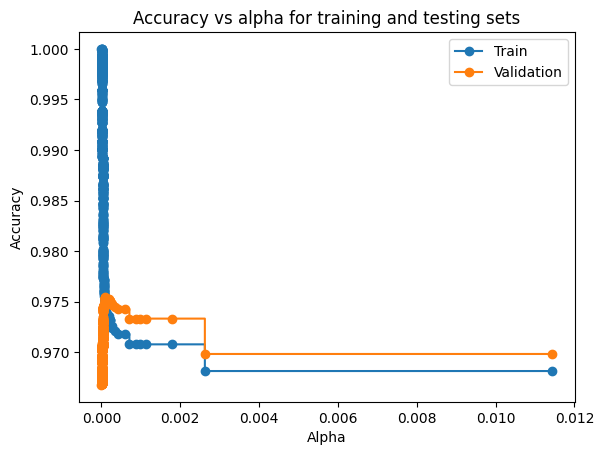

In [ ]:
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, validation_scores, marker='o', label='Validation', drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs alpha for training and testing sets')
plt.legend()
plt.show()

In [ ]:
accuracy_list = pd.DataFrame(
    {'validation_scores': validation_scores,
     'ccp_alphas': ccp_alphas,
    })

accuracy_list

# alternatively find the max value
accuracy_list[accuracy_list['validation_scores']==accuracy_list['validation_scores'].max()]


,validation_scores,ccp_alphas
620,0.975442,0.000086


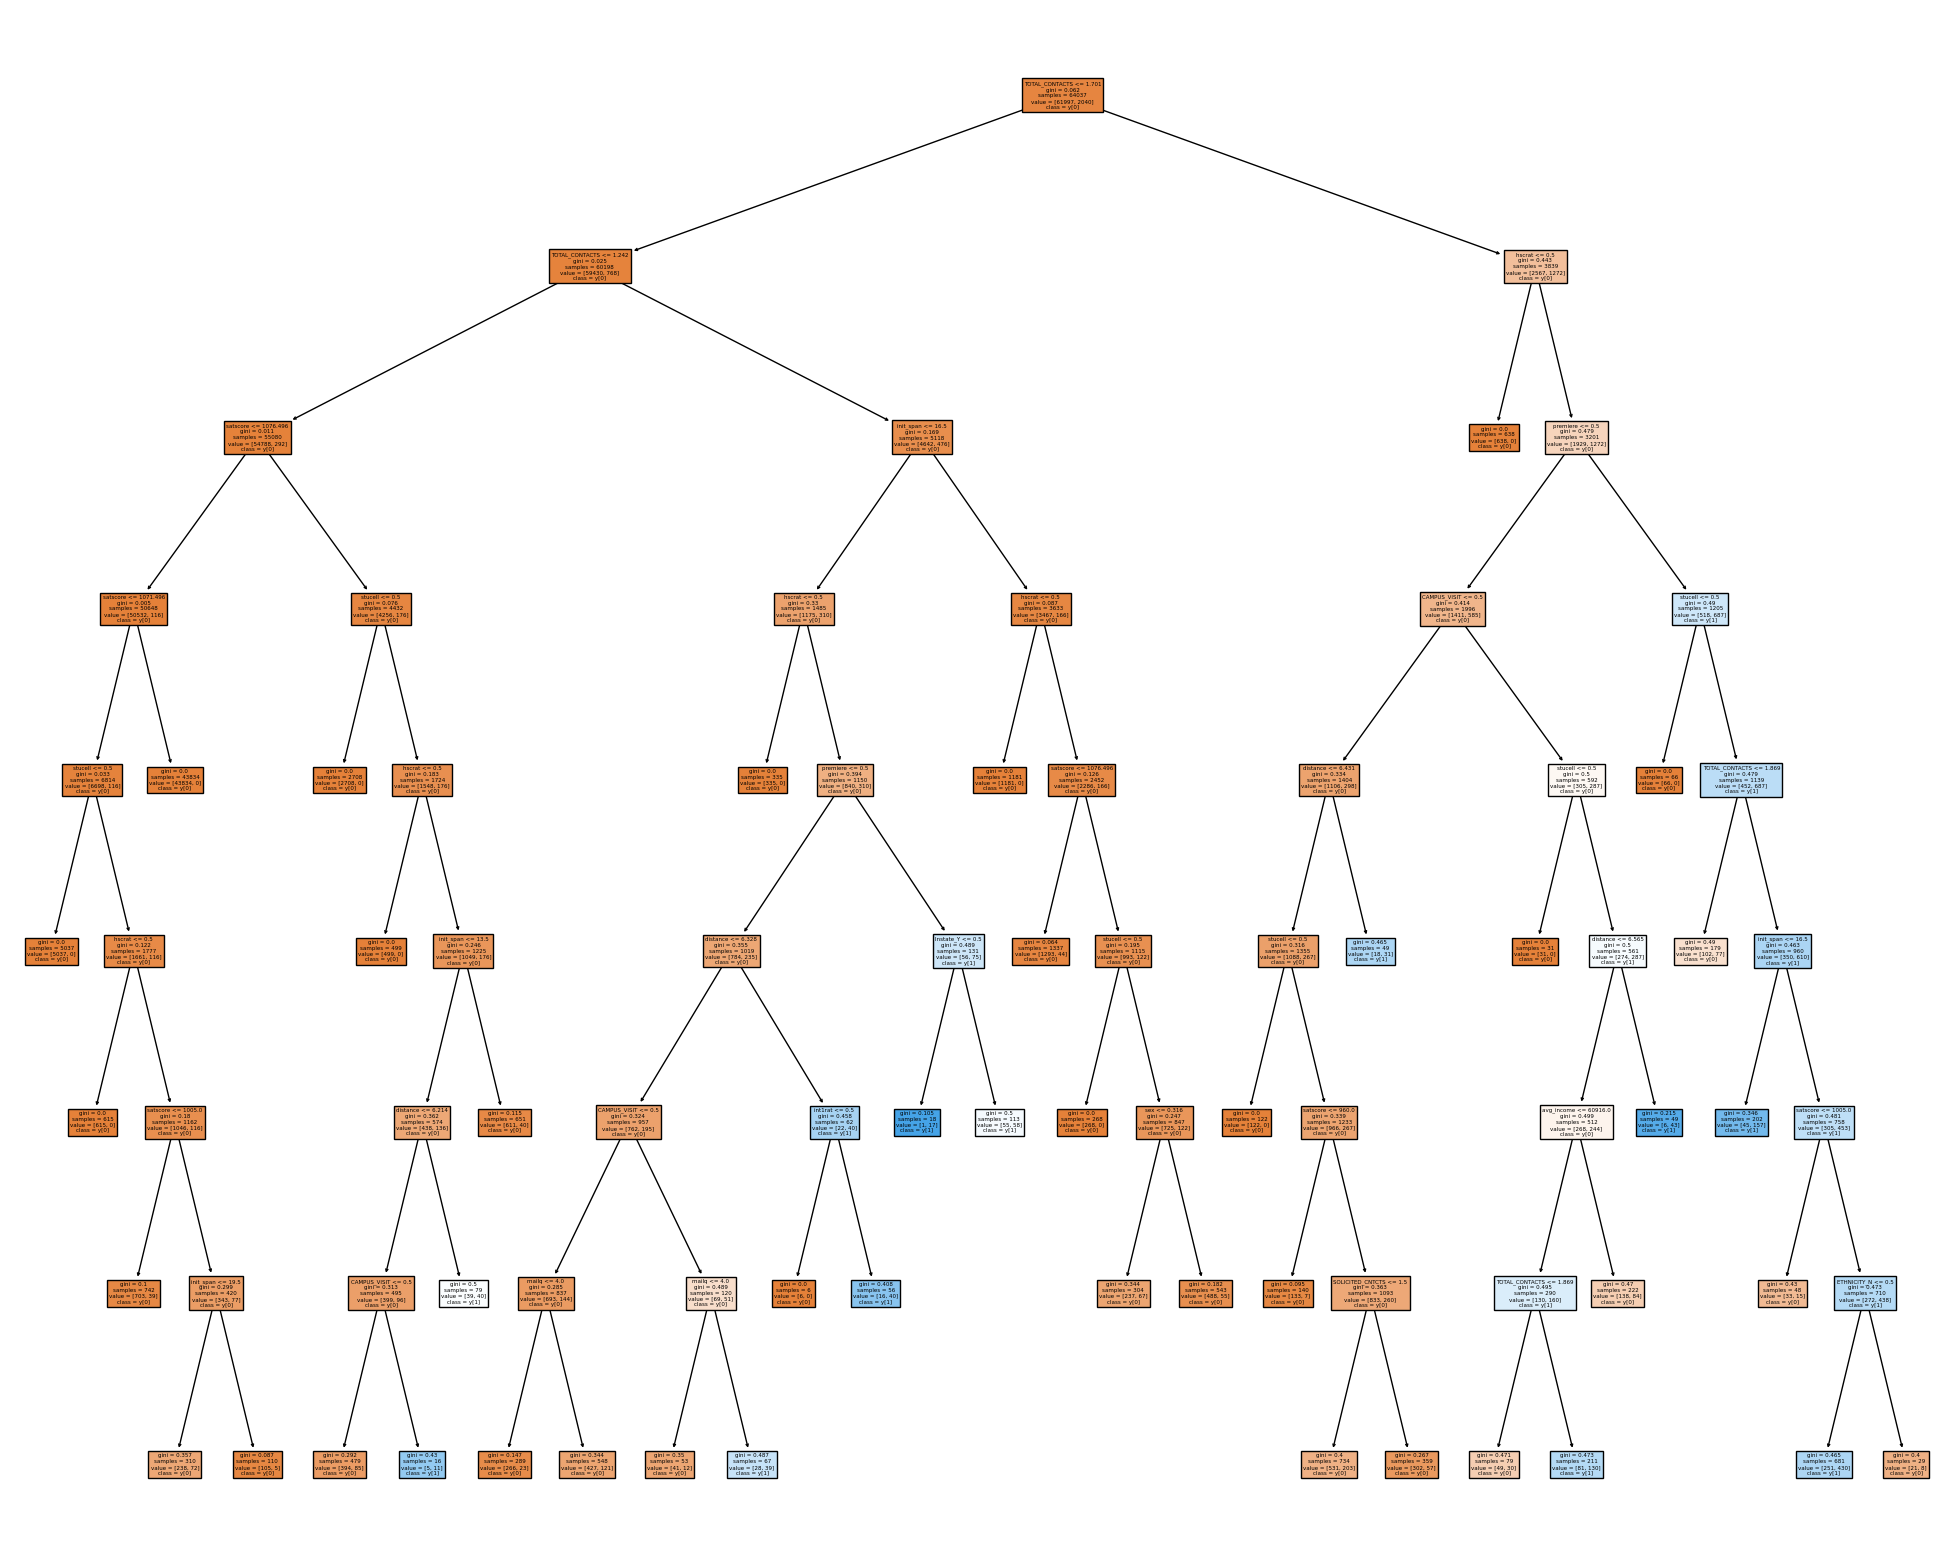

In [ ]:
treeXG = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.000086)
treeXG = treeXG.fit(dfXGX_train,dfXGy_train)

plt.figure(figsize=[25,20])
tree.plot_tree(treeXG,
               feature_names=list(dfXGX_train.columns.values),
               class_names=True,
               filled=True)
plt.show()

Decision Tree Score:  0.9754417926762616
Specificity:  0.9900815268437465
Decision Tree Accuracy:  0.9795606182456855


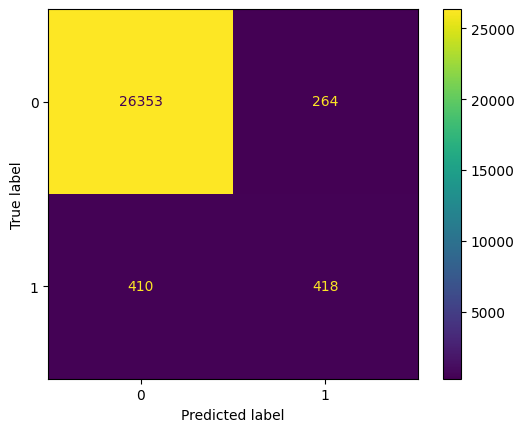

In [ ]:
# model performance - confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score

prediction2 = treeXG.predict(dfXGX_val)

# confusion matrix
cm = confusion_matrix(dfXGy_val,prediction2) # # row - true value; column - predicted
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# accuracy
print('Decision Tree Score: ',treeXG.score(dfXGX_val,dfXGy_val))

# specificity
tn, fp, fn, tp = confusion_matrix(dfXGy_val, prediction2).ravel()
specificity = tn / (tn+fp)
print('Specificity: ',specificity)

# roc curve
prediction_prob = treeXG.predict_proba(dfXGX_val)
dt_auc = roc_auc_score(dfXGy_val, prediction_prob[:,1])
print('Decision Tree Accuracy: ',dt_auc)